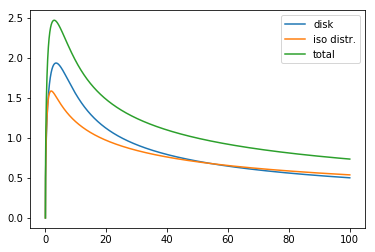

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from scipy import *
import scipy as sp

def Numerical():
    alpha = 1
    beta = 1
    gamma = 1
    Rho_0 = 1
    Rs = 1
    G = 1
    params = [alpha,beta,gamma,Rho_0,Rs,G]

   
    #define R  as a linear space
    R_min = 0.1
    R_max = 100
    R_step = 10000
    R = np.linspace(R_min,R_max,R_step)
 #define the density profile
    Rho =Rho_0/ ((1+(R/Rs)**2)**(3/2))
    #Rho_0/ ( (R/Rs)**gamma * (1+(R/Rs)**alpha)**((beta-gamma)/alpha) ) Somethings worng with this one

    Rho_iso = Rho_0/ (1 + ((R/Rs)**2)) 
    
    
    
    #visible mass, velocity of this mass in outer regions
    m_vis =1 #(5 * (10**43))
    v_vis = np.sqrt((G*m_vis)/R) 
    
    #disk distribution
    Rd = 2 #scale length of disk, kpc
    rho_disk = Rho_0 * exp(-R/Rd) #distribution ON plane of disk
    
    #Rho_0/ ((1+(R/Rs)**2)**(3/2)) works well
    
    #Get Rho as a list
    #Rho = Rho(R,params)
    
    J = 2*np.pi*R #The Jacodian for the integral
    U = J*Rho #the integrand 
    #print(U)
    U_iso = J*Rho_iso
    U_disk = J*rho_disk
    
    
    #Get the mass as a list
    #requieres an integral
    M =  cumtrapz(U, x=R, dx = R_step, initial = 0)
    M_iso =  cumtrapz(U_iso, x=R, dx = R_step, initial = 0)
    M_disk = cumtrapz(U_disk, x=R, dx = R_step, initial = 0)
    #M = M(Rho,R,params)
    #print M
    
    V = np.sqrt((G*M)/R)
    
    V_tot = np.sqrt( (v_vis**2) + (V**2))
    
    V_iso = np.sqrt( (G*M_iso)/R)
    
    V_tot1 = np.sqrt( (V_iso**2) + (v_vis**2))
    
    V_disk = np.sqrt( (G*M_disk)/R)
    
    V_tot2 = np.sqrt( (V_iso**2) + (V_disk**2))
    
    plt.figure
    #plt.plot(R,V)
    #plt.plot(R,U)
    #plt.plot(R,M)
    
    #group 1
    #plt.plot(R,V_iso)
    #plt.plot(R,v_vis)
    #plt.plot(R,V_tot1)
    
    plt.plot(R, V_disk)
    plt.plot(R,V_iso)
    plt.plot(R,V_tot2)
    plt.legend(['disk','iso distr.','total'])
    
    plt.show()

if __name__ == '__Numerical__':
    Numerical()
Numerical()